OVERVIEW:

In this tutorial notebook, we will optimize of the maintenance of trees in the city of Paris. We will  analyze the height of trees in the city and their distribution by district and by tree species.

Steps are:
- We will work with "arbes-fr.csv" dataset
- We will perform EDA
- The maximum height of the trees in Paris is 62.5m.
- The maximum  circumference in Paris is 1300 cm.

- Finally we will use the folium module to detect the location of trees of different spicies in Paris.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
data = pd.read_csv("arbres-fr.csv", sep=";")
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [3]:
data.shape

(200137, 18)

In [4]:
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

In [5]:
data.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

We find the columns with null values

In [6]:
data.isna().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [7]:
data.columns[data.isna().any()].tolist()

['domanialite',
 'complement_addresse',
 'numero',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'stade_developpement',
 'remarquable']

In [8]:
len(data['espece'].value_counts(dropna=True).index.tolist())

539

In [9]:
# Get rid of the NaN values in the column "espece"
data= data.dropna(subset=['espece'])

In [10]:
data.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

In [11]:
data.shape

(198385, 18)

In [12]:
data.columns[data.isna().any()].tolist()

['domanialite',
 'complement_addresse',
 'numero',
 'libelle_francais',
 'variete',
 'stade_developpement',
 'remarquable']

In [13]:
len(data['espece'].value_counts().index.tolist())

539

### There are 539 species of trees in Paris City

In [14]:
data['espece'].value_counts(dropna=False).nlargest(5)

x hispanica      36409
hippocastanum    20039
japonica         11822
n. sp.            9063
tomentosa         8962
Name: espece, dtype: int64

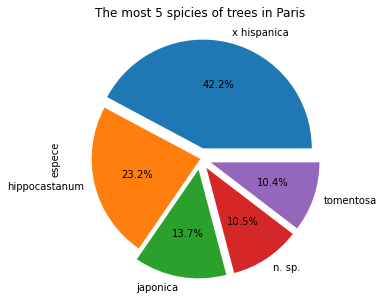

In [15]:
plt.figure(figsize =(14,5))
data['espece'].value_counts().nlargest(5).plot.pie(center=(0, 0), 
                                                   radius=1.0, autopct='%1.1f%%', explode=(0.1, 0.0, 0.1, 0.1, 0.1)).set_title('The most 5 spicies of trees in Paris');

### We plot the percentage of different species of trees in Paris .

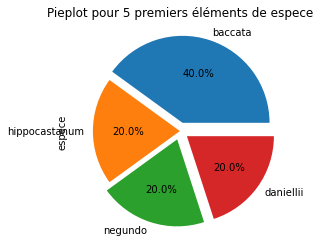

In [16]:
data['espece'][0:5].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%', 
                                            explode=(0.1, 0.0, 0.1, 0.1)).set_title('Pieplot pour 5 premiers éléments de espece');

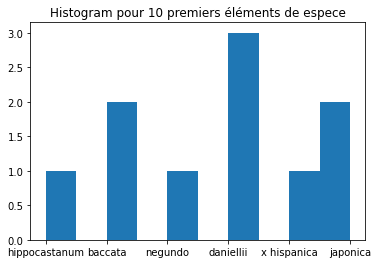

In [17]:
data['espece'][0:10].hist(grid=False).set_title('Histogram pour 10 premiers éléments de espece');

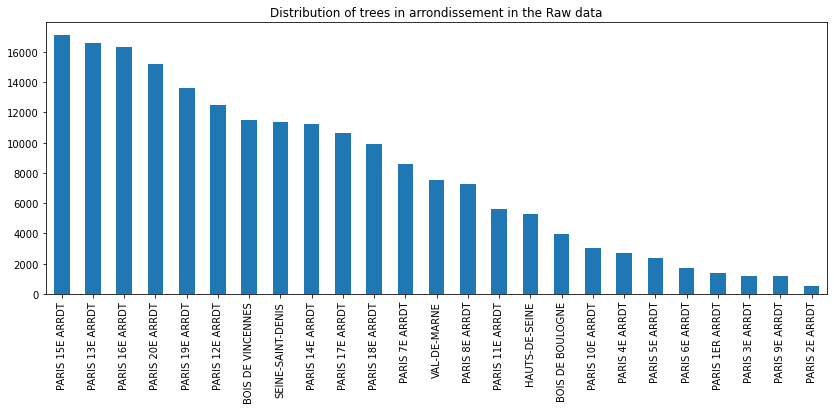

In [18]:
plt.figure(figsize =(14,5))
data['arrondissement'].value_counts().plot.bar().set_title('Distribution of trees in arrondissement in the Raw data');

In [19]:
D15=data[data['arrondissement']=='PARIS 7E ARRDT']

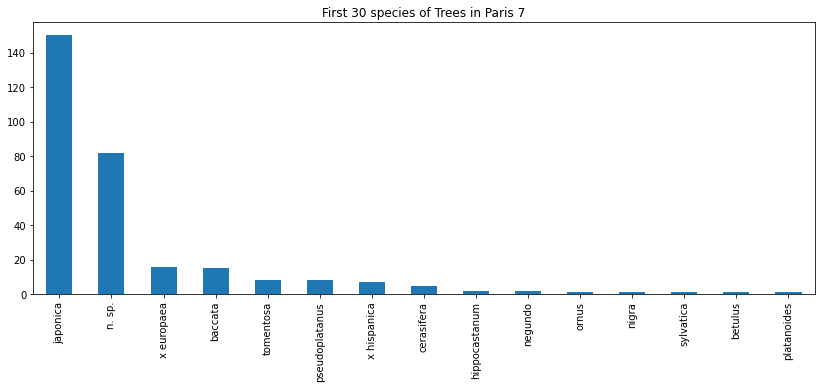

In [20]:
plt.figure(figsize =(14,5))
D15['espece'][0:300].value_counts().plot.bar().set_title('First 30 species of Trees in Paris 7');

### Presence of outliers

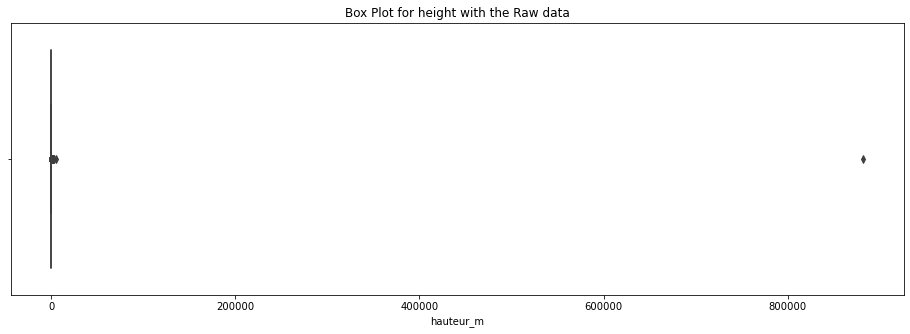

In [21]:
plt.figure(figsize=(16,5))
sns.boxplot(x='hauteur_m', data=data).set_title('Box Plot for height with the Raw data');

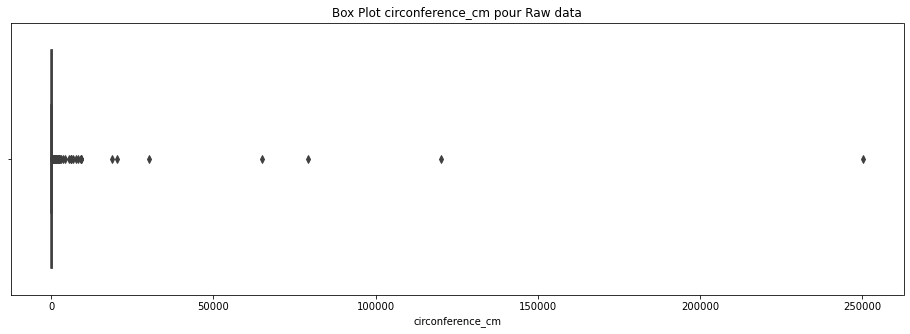

In [22]:
plt.figure(figsize=(16,5))
sns.boxplot(x='circonference_cm', data=data).set_title('Box Plot circonference_cm pour Raw data');

### From the net we see that the maximum height of the trees in Paris is 62.5 meters. So we fiter the data.

In [23]:
data = data[data['hauteur_m']<= 62.5]

In [24]:
data.hauteur_m.describe()

count    197997.000000
mean          8.378713
std           6.268269
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          60.000000
Name: hauteur_m, dtype: float64

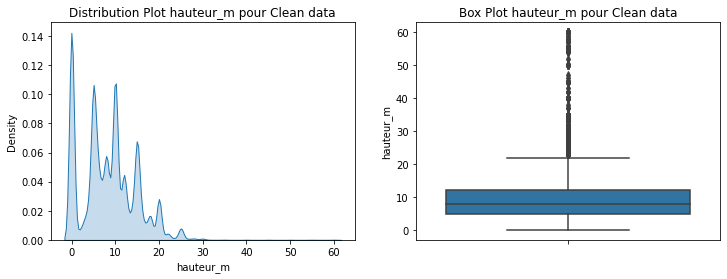

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(data['hauteur_m'], fill=True).set_title('Distribution Plot hauteur_m pour Clean data');
plt.subplot(1,2,2)
sns.boxplot(y='hauteur_m', data=data).set_title('Box Plot hauteur_m pour Clean data');
plt.show()

### From the net we see that the maximum circonference of the trees in Paris is 1300 cm. So we fiter the data in terms of circumference.

In [26]:
df = data[data['circonference_cm']<= 1300]

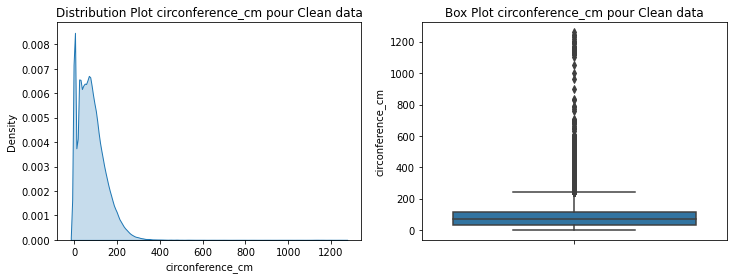

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['circonference_cm'], fill=True).set_title('Distribution Plot circonference_cm pour Clean data');
plt.subplot(1,2,2)
sns.boxplot(y='circonference_cm', data=df).set_title('Box Plot circonference_cm pour Clean data');
plt.show()

#### Also we get rid of the columns 'id', 'complement_addresse', 'numero', 'lieu', 'id_emplacement' as it is not of any use to us.

In [28]:
data = data.drop(['id', 'complement_addresse', 'numero', 'lieu', 'id_emplacement'], axis=1)

In [29]:
data.columns

Index(['type_emplacement', 'domanialite', 'arrondissement', 'libelle_francais',
       'genre', 'espece', 'variete', 'circonference_cm', 'hauteur_m',
       'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

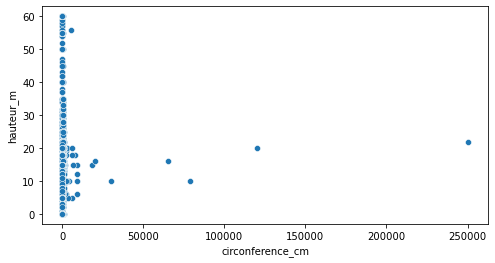

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=data,x='circonference_cm',y='hauteur_m')
plt.show()

### There is no correlation between circumference and height

### We have divided the tree database between heights 0 to 3 meters, 3 to 20 meters, 20 to 30 meters and over 30 meters. 

--First, we analyze the height from 0 to 3 meters compared to the PARIS 7E arrondissement

In [31]:
d_1 = data[(data['hauteur_m']<=3) & (data['arrondissement']=='PARIS 7E ARRDT')]

-- We analyze the height of trees between 3 and 20 meters in PARIS 7E arrodiment

In [32]:
d_2 = data[(data['hauteur_m']>3) & (data['hauteur_m']<=20) & (data['arrondissement']=='PARIS 7E ARRDT')]

-- We analyze the height of trees between 20 to 30 meters in PARIS 7E arrodiment

In [33]:
d_3 = data[(data['hauteur_m']>20) & (data['hauteur_m']<=30) & (data['arrondissement']=='PARIS 7E ARRDT')]

-- We analyze the height of trees above 30 meters in PARIS 7E arrodiment

In [34]:
d_4 = data[(data['hauteur_m']>30) & (data['arrondissement']=='PARIS 7E ARRDT')]

### Now we want to find the places where the trees from 0 to 3 meters are located. For this we will use the folium module

In [35]:
m_1 = folium.Map(location=[48.854863, 2.300805], zoom_start=15) 

In [36]:
for i,row in d_1.iterrows():
    geo_point_2d_a = d_1.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_1.at[i, 'geo_point_2d_b']
    espece = d_1.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='red')).add_to(m_1)

In [37]:
m_1.save('m_1.html')

#### Now we want to find the places where the trees from 3 to 20 meters are located.

In [38]:
m_2 = folium.Map(location=[48.857620, 2.320962], zoom_start=15) 

In [39]:
for i,row in d_2.iterrows():
    geo_point_2d_a = d_2.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_2.at[i, 'geo_point_2d_b']
    espece = d_2.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='green')).add_to(m_2)

In [40]:
m_2.save('m_2.html')

####  Now we want to find the places where the trees from 20 to 30 meters are located.

In [41]:
m_3 = folium.Map(location=[48.857453, 2.320804], zoom_start=15) 

In [42]:
for i,row in d_3.iterrows():
    geo_point_2d_a = d_3.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_3.at[i, 'geo_point_2d_b']
    espece = d_3.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='blue')).add_to(m_3)

In [43]:
m_3.save('m_3.html')

In [44]:
m_4 = folium.Map(location=[48.854385, 2.310478], zoom_start=15) 

In [45]:
for i,row in d_4.iterrows():
    geo_point_2d_a = d_4.at[i, 'geo_point_2d_a']
    geo_point_2d_b = d_4.at[i, 'geo_point_2d_b']
    espece = d_4.at[i, 'espece']
    folium.Marker(location=[geo_point_2d_a, geo_point_2d_b], popup=espece, icon=folium.Icon(color='purple')).add_to(m_4)

In [46]:
m_4.save('m_4.html')